In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
(xTrain, yTrain),(xTest, yTest) = mnist.load_data() # 60000, 10000건 데이터

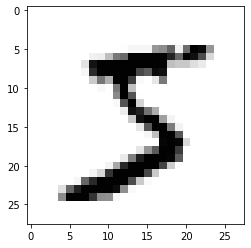

In [3]:
plt.imshow(xTrain[0], cmap = 'Greys') # xTrain의 0번째 데이터 출력
plt.show()
# 모델을 만들 때 전처리 과정에서 할 수 있는것   - 스케일에 따른 정규화

In [5]:
# 차원축소 후 정규화
xTrain = xTrain.reshape(xTrain.shape[0],784) 
xTrain = xTrain/255 # 소수이하 실수값이 나오질 않는다. 
xTest = xTest.reshape(xTest.shape[0],784) 
xTest = xTest/255 # 소수이하 실수값이 나오질 않는다. 

In [6]:
yTrain = np_utils.to_categorical(yTrain,10)
yTest = np_utils.to_categorical(yTest,10)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [8]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [10]:
es = EarlyStopping(monitor='val_loss', patience=10)
#validation data의 loss가 10회이상 계속해서 줄어들지 않으면 모델링 중단.

In [11]:
# 트레이닝, 검증, 테스트 : 현재는 따로 검증용 데이터를 생성하지 않고 테스트로 모델의 정확도만 파악
model.fit(xTrain, yTrain, validation_data = (xTest, yTest), epochs = 30, batch_size=200, callbacks=[es])

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 1.6308 - accuracy: 0.6463 - val_loss: 32.6839 - val_accuracy: 0.7105
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.6964 - accuracy: 0.8376 - val_loss: 48.1730 - val_accuracy: 0.7520
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.4766 - accuracy: 0.8770 - val_loss: 58.0795 - val_accuracy: 0.7558
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.3950 - accuracy: 0.8931 - val_loss: 60.7601 - val_accuracy: 0.7719
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.3539 - accuracy: 0.9021 - val_loss: 57.8425 - val_accuracy: 0.7906
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 0.3286 - accuracy: 0.9075 - val_loss: 55.2340 - val_accuracy: 0.8072
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.3108 - accuracy: 0.9117 - val_loss: 53.5178 - val_accuracy: 0.8159

# CNN

In [18]:
from keras.layers import *

In [19]:
(xTrain, yTrain),(xTest, yTest) = mnist.load_data() # 60000, 10000건 데이터

In [20]:
xTrain = xTrain.reshape(xTrain.shape[0],28, 28, 1).astype('float64')/255 
xTest = xTest.reshape(xTest.shape[0],28, 28, 1).astype('float64')/255

In [21]:
yTrain = np_utils.to_categorical(yTrain,10)
yTest = np_utils.to_categorical(yTest,10)

In [23]:
# 모델 설계는 어디까지나 본인나름.
model = Sequential() # sequential객체생성
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28,1), activation='relu')) # conv2D 층 
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2)) 
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              


conv2d (Conv2D)              (None, 26, 26, 32)        320       conv1층 - 32개 필터로 요약된 28*28 이미지 
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     conv2층 - 64개 필터로 요약된 26*26 이미지 
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         maxPooling -  24*24 이미지 압축
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         randomly weighting - 과적합 방지 (0.25)
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=10)
model.fit(xTrain, yTrain, validation_data = (xTest, yTest), epochs = 30, batch_size=200, callbacks=[es])

Epoch 1/30
300/300 [==============================] - 48s 161ms/step - loss: 0.2733 - accuracy: 0.9171 - val_loss: 0.0537 - val_accuracy: 0.9828
Epoch 2/30
300/300 [==============================] - 46s 155ms/step - loss: 0.0879 - accuracy: 0.9738 - val_loss: 0.0410 - val_accuracy: 0.9872
Epoch 3/30
300/300 [==============================] - 48s 159ms/step - loss: 0.0667 - accuracy: 0.9803 - val_loss: 0.0349 - val_accuracy: 0.9884
Epoch 4/30
300/300 [==============================] - 48s 161ms/step - loss: 0.0522 - accuracy: 0.9842 - val_loss: 0.0283 - val_accuracy: 0.9908
Epoch 5/30
300/300 [==============================] - 52s 175ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0260 - val_accuracy: 0.9908
Epoch 6/30
300/300 [==============================] - 49s 162ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0264 - val_accuracy: 0.9920
Epoch 7/30
300/300 [==============================] - 48s 159ms/step - loss: 0.0344 - accuracy: 0.9896 - val_loss: 0.0259 - val_ac